Для удобства я облачил процесс обучения и тестирования в функции

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [4]:
y[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [21]:
### Шаг 3. Обученние нейронной сети
def neuro_net_train(neuron_numb, era, nu, X_train_loc= None, y_train_loc=None):
    # определим число нейронов скрытого слоя
    #neuron_numb = 35


    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(era):

        # прямое распространение(feed forward)
        layer0 = X_train_loc
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train_loc - layer2 # производная функции потерь = производная квадратичных потерь 
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w1 += layer1.T.dot(layer2_delta) * nu
        w0 += layer0.T.dot(layer1_delta) * nu
        # метрика модели
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    return [accuracy, errors, layer2], [w0, w1]

def neuro_net_train3(neuron_numb, neuron_numb2, era, nu, X_train_loc= None, y_train_loc=None):
    # определим число нейронов скрытого слоя
    #neuron_numb = 35


    # присваевание случайных весов
    w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя
    w1 = 2*np.random.random((neuron_numb,neuron_numb2)) - 1 # для внутреннего слоя 
    w2 = 2*np.random.random((neuron_numb2, 3)) - 1 # для внутреннего слоя 

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(era):

        # прямое распространение(feed forward)
        layer0 = X_train_loc
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
        layer3 = sigmoid(np.dot(layer2, w2))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer3_error = y_train_loc - layer3 # производная функции потерь = производная квадратичных потерь 
        layer3_delta = layer3_error * sigmoid_deriv(layer3)
    
        layer2_error = layer3_delta.dot(w2.T)
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        # коррекция
        w2 += layer2.T.dot(layer3_delta) * nu
        w1 += layer1.T.dot(layer2_delta) * nu
        w0 += layer0.T.dot(layer1_delta) * nu
        # метрика модели
        error = np.mean(np.abs(layer3_error))
        errors.append(error)
        accuracy = (1 - error) * 100
    return [accuracy, errors, layer3], [w0, w1, w2]
    
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
def represent_train(errors):
    plt.figure(figsize = (16,5))
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')
    plt.show() # расскоментируйте, чтобы посмотреть 

def represent_res(layer, y_train):
    N = 50
    plt.figure(figsize = (16,5))
    plt.plot(layer[:N,1], 'r',label = 'Y new')
    plt.plot(y_train[:N,1],'g', label = 'Y train')
    plt.xlabel('№ примера')
    plt.ylabel('выход сети и целевой')
    plt.legend( )
    plt.show() # расскоментируйте, чтобы посмотреть '''
    
def accuracy(accuracy):     
    print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

тестовая проверка работы функции обучения

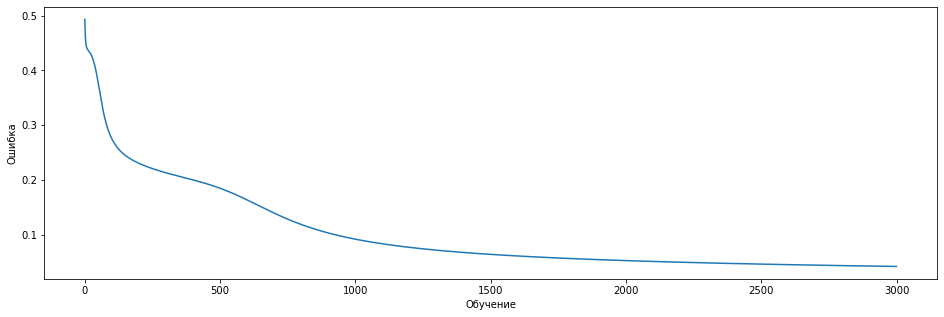

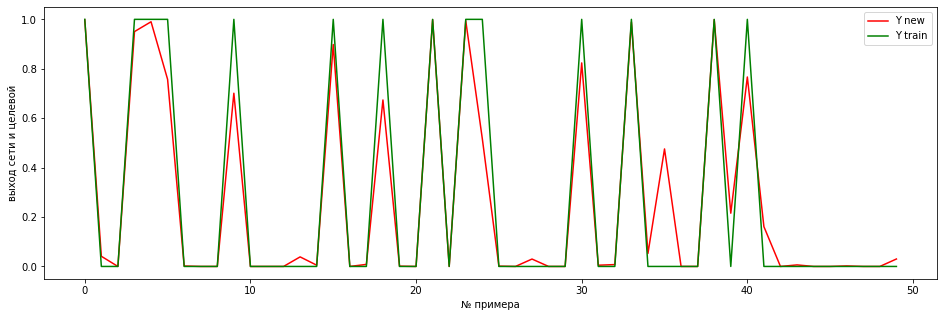

Аккуратность нейронной сети 95.82%


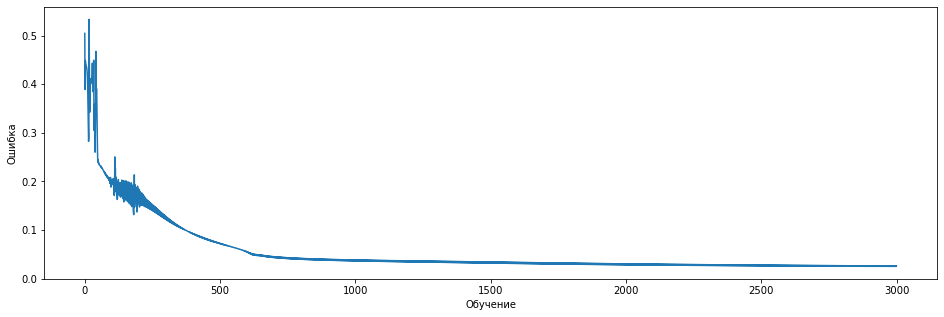

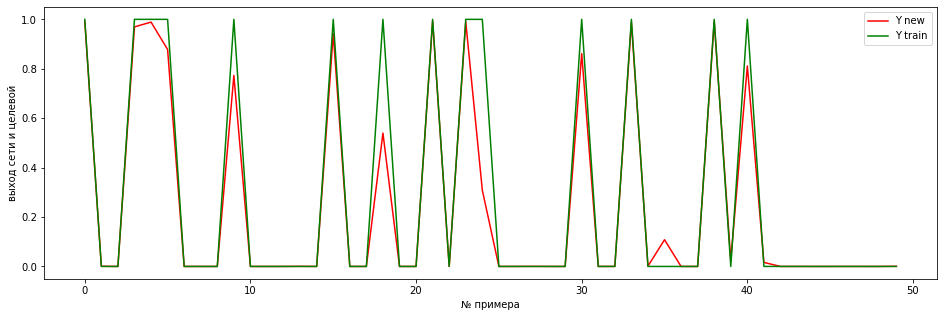

Аккуратность нейронной сети 97.41%


In [22]:
results, params = neuro_net_train(5, 3000, 0.05, X_train, y_train)
represent_train(results[1])
represent_res(results[2], y_train)
accuracy(results[0])

results3, params3 = neuro_net_train3(5, 5, 3000, 0.5, X_train, y_train)
represent_train(results3[1])
represent_res(results3[2], y_train)
accuracy(results3[0])

тестовая проверки работы функции запуска сети

In [23]:
def neuro_net_run(params, X_test_loc, y_test_loc):
    # прямое распространение(feed forward)
    layer0_t = X_test_loc
    layer1_t = sigmoid(np.dot(layer0_t, params[0]))
    layer2_t = sigmoid(np.dot(layer1_t, params[1]))
    layer2_error_t = y_test_loc - layer2_t
    error_t = np.mean(np.abs(layer2_error_t))
    accuracy_t = (1 - error_t) * 100
    return [accuracy_t, layer2_t]

def neuro_net_run3(params, X_test_loc, y_test_loc):
    # прямое распространение(feed forward)
    layer0_t = X_test_loc
    layer1_t = sigmoid(np.dot(layer0_t, params[0]))
    layer2_t = sigmoid(np.dot(layer1_t, params[1]))
    layer3_t = sigmoid(np.dot(layer2_t, params[2]))
    layer3_error_t = y_test_loc - layer3_t
    error_t = np.mean(np.abs(layer3_error_t))
    accuracy_t = (1 - error_t) * 100
    return [accuracy_t, layer3_t]

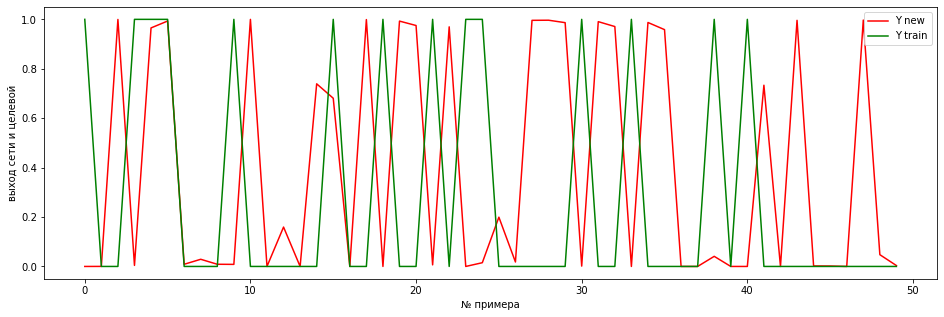

Аккуратность нейронной сети 95.27%


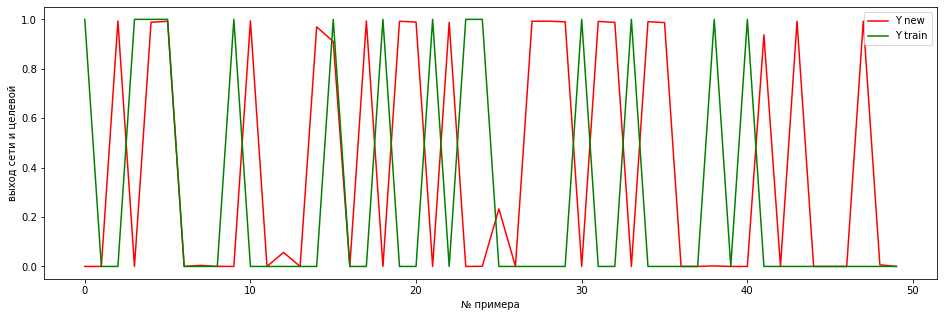

Аккуратность нейронной сети 96.38%


In [24]:
res = neuro_net_run(params,X_test, y_test)

represent_res(res[1], y_train)
accuracy(res[0])

res3 = neuro_net_run3(params3,X_test, y_test)

represent_res(res3[1], y_train)
accuracy(res3[0])

запуск цикла для записи всех значений в датафрейм

In [26]:
%%time

Error_table = pd.DataFrame(columns =['neurons number', 'learning rate', 'epoch', 'mean acc.(train)', 'mean acc.(test)'] )
ind = 0
for neurons in [1, 3, 5, 7, 10, 15, 30, 50, 100, 200]:
    for learn_rate in [0.0001, 0.005, 0.05, 0.5]:
        acc_mas = []
        acc_mas_t = []
        for era in [1000, 2000, 5000]:
            for j in range(10):
                results, params = neuro_net_train(neurons, era, learn_rate, X_train, y_train)
                acc_mas.append(results[0])
                res = neuro_net_run(params,X_test, y_test)
                acc_mas_t.append(res[0])
            Error_table.loc[ind, ['neurons number', 'learning rate', 'epoch', 'mean acc.(train)', 'mean acc.(test)']] \
                                        = [neurons, learn_rate, era, np.mean(acc_mas), np.mean(acc_mas_t)]
            ind += 1

Wall time: 5min 6s


In [27]:
%%time

Error_table3 = pd.DataFrame(columns =['neurons number1', 'neurons number2', 'learning rate', 
                                     'epoch', 'mean acc.(train)', 'mean acc.(test)'] )
ind = 0
for neurons1 in [1, 3, 5, 7, 10, 15,]:
    for neurons2 in [1, 3, 5, 7, 10, 15,]:
        for learn_rate in [0.0001, 0.005, 0.05, 0.5]:
            acc_mas3 = []
            acc_mas_t3 = []
            for era in [1000, 2000, 5000]:
                for j in range(10):
                    results3, params3 = neuro_net_train3(neurons1, neurons2, era, learn_rate, X_train, y_train)
                    acc_mas3.append(results3[0])
                    res3 = neuro_net_run3(params3,X_test, y_test)
                    acc_mas_t3.append(res3[0])
                    Error_table3.loc[ind, ['neurons number1', 'neurons number2', 'learning rate', 'epoch',
                                            'mean acc.(train)', 'mean acc.(test)']]\
                    = [neurons1, neurons2, learn_rate, era, np.mean(acc_mas3), np.mean(acc_mas_t3)]
                    ind += 1

Wall time: 13min 58s


In [28]:
Error_table.head(20)

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
0,1,0.0001,1000,50.3252,50.2695
1,1,0.0001,2000,50.829,50.7012
2,1,0.0001,5000,51.6303,51.4461
3,1,0.005,1000,55.9476,54.9373
4,1,0.005,2000,57.039,55.4954
5,1,0.005,5000,59.2298,56.8497
6,1,0.05,1000,66.6401,61.6668
7,1,0.05,2000,67.1075,62.0111
8,1,0.05,5000,67.4064,62.2266
9,1,0.5,1000,67.7357,63.1673


In [29]:
Error_table3.head(20)

,neurons number1,neurons number2,learning rate,epoch,mean acc.(train),mean acc.(test)
0,1,1,0.0001,1000,50.34,50.9856
1,1,1,0.0001,1000,50.6392,51.3072
2,1,1,0.0001,1000,50.6224,51.0663
3,1,1,0.0001,1000,50.5846,50.7891
4,1,1,0.0001,1000,50.534,50.7698
5,1,1,0.0001,1000,50.4766,50.6619
6,1,1,0.0001,1000,50.4677,50.6192
7,1,1,0.0001,1000,50.5172,50.7138
8,1,1,0.0001,1000,50.6328,50.8692
9,1,1,0.0001,1000,50.8404,51.0273


In [30]:
Error_table.to_csv('Error_table.csv', sep = ';')

In [31]:
Error_table3.to_csv('Error_table3.csv', sep = ';')

Рассмотрим сначала двухслойную сеть

In [32]:
Error_table.sort_values(['mean acc.(test)'], ascending = False).head(30)

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
59,10,0.5,5000,97.2862,96.2608
47,7,0.5,5000,97.2706,96.24
35,5,0.5,5000,97.2528,96.2284
23,3,0.5,5000,97.1738,96.178
58,10,0.5,2000,96.8826,96.1542
46,7,0.5,2000,96.8627,96.1029
34,5,0.5,2000,96.8542,96.0472
22,3,0.5,2000,96.7439,96.0235
57,10,0.5,1000,96.467,96.0002
45,7,0.5,1000,96.4722,95.927


Из таблицы выше выидно, что лучшие результаты получаются у сетей с 3 -15 нейронов при этом скорость обучения 0.5. Увеличение количества эпох не сильно повлияло на эффективность.

In [33]:
Error_table.sort_values(['mean acc.(test)']).head(30)

,neurons number,learning rate,epoch,mean acc.(train),mean acc.(test)
117,200,0.5,1000,49.5333,47.6
0,1,0.0001,1000,50.3252,50.2695
1,1,0.0001,2000,50.829,50.7012
2,1,0.0001,5000,51.6303,51.4461
12,3,0.0001,1000,52.0698,51.6276
107,100,0.5,5000,52.2664,52.133
119,200,0.5,5000,53.8222,52.3556
118,200,0.5,2000,53.7,52.6
13,3,0.0001,2000,53.1762,52.7695
106,100,0.5,2000,53.4996,52.9996


Хуже всего ведут себя сети с очень маленьким количеством нейронов и с очень маленькой сокростью обучения. Так же плохо себя показывают сети с очень большим количеством нейронов.

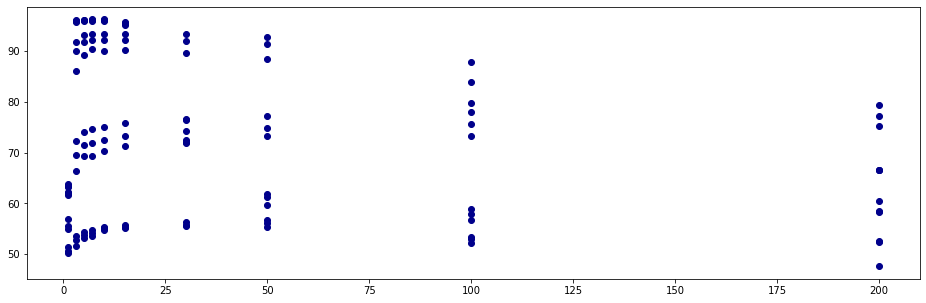

In [34]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['neurons number'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show()                                     

Выше сказанное можно понять и по графику. Лучшие показатели у сетей с нейронами от 3 - 30, но при этом в них и самый большой разброс

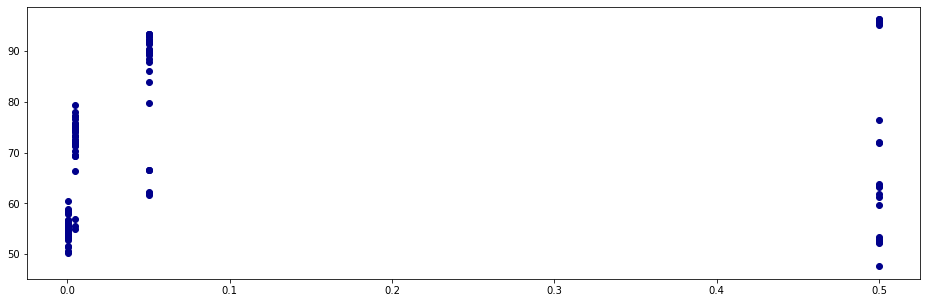

In [35]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['learning rate'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show()  

Так же можно сказать, что самые лучшие показатели у скорости обучения 0.5, чуть хуже у 0.05,
остальные скорости обучения проигрывают этим двум. Однако, у скорости 0.5 очень много низких значений, 
это, как было видно из таблицы, вызвано либо большим/слишком малым количеством нейронов

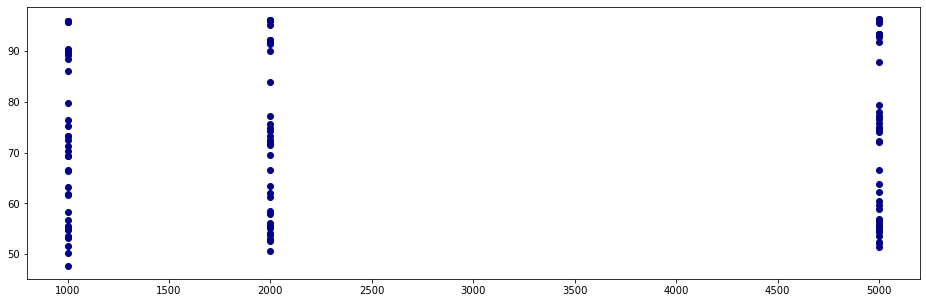

In [36]:
plt.figure(figsize = (16,5))
plt.scatter(x=Error_table['epoch'],
                       y=Error_table['mean acc.(test)'],
                       c='DarkBlue')
plt.show() 

При этом можно сказать, что количество эпох не влияет определяющим образом на качество обучения модели, хотя из данных можно заметить, что при большом количестве эпох сети с большим количеством нейронов начинают вести себя лучше

Можно сделать выводы, что ключевыми параметрами являются количество нейронов и скорость обучения, при этом их нужно подбирать в совокупности. Слишком большое или малое количество нейронов может негативно сказаться на эффективности, при этом слишком малая скорость обучения, так же может принести вред

Рассмотрим теперь трехслойную сеть

In [37]:
display(Error_table3.sort_values(['mean acc.(test)'], ascending = False).head(30))
display(Error_table3.sort_values(['mean acc.(test)']).head(30))

,neurons number1,neurons number2,learning rate,epoch,mean acc.(train),mean acc.(test)
3570,10,15,0.5,1000,96.7434,96.362
1770,5,5,0.5,1000,96.7348,96.351
4079,15,7,0.5,5000,97.4602,96.2563
4170,15,10,0.5,1000,96.931,96.2509
4078,15,7,0.5,5000,97.4172,96.2355
4171,15,10,0.5,1000,96.7475,96.218
4077,15,7,0.5,5000,97.3687,96.2118
3571,10,15,0.5,1000,96.7461,96.211
3479,10,10,0.5,5000,97.3853,96.2103
2131,5,15,0.5,1000,96.6015,96.1883


,neurons number1,neurons number2,learning rate,epoch,mean acc.(train),mean acc.(test)
722,3,1,0.0001,1000,49.2015,48.8071
720,3,1,0.0001,1000,49.756,48.9406
721,3,1,0.0001,1000,49.5972,49.0456
2880,10,1,0.0001,1000,49.5148,49.4643
1560,5,3,0.0001,1000,49.5419,49.5605
723,3,1,0.0001,1000,50.2554,49.7269
1440,5,1,0.0001,1000,50.8844,49.8661
2160,7,1,0.0001,1000,49.7506,49.8705
724,3,1,0.0001,1000,50.4424,49.9216
725,3,1,0.0001,1000,50.433,50.0487


Из таблицы видно, что данная сеть по эффективности близка к двухслойной, даже немного похуже. При этом лучшие результаты достигаются, когда в слоях 5-10 нейрнов. При этом наибольшая эффективность достигается при большом количестве эпох и быстрой скорости обучения.